# Regresión Polinomial

La regresión polinomial es una técnica utilizada en estadísticas y aprendizaje automático para modelar relaciones no lineales entre las variables independientes (características) y la variable dependiente (objetivo). Mientras que la regresión lineal ajusta una línea recta a los datos, la regresión polinomial utiliza polinomios de grado superior para ajustarse a patrones más complejos. Para ello debemos realizar un mapeo polinomial a nuestro vector de caracteristicas de dimensión $\mathbb{R}^n$ para pasar a una dimensión $\mathbb{R}^m$, donde $m>n$.

Es decir si tenemos un vector con una variable independiente $x_1$ y aplicamos una expansión polinomial de grado 3, obtendremos un vector transformado de la forma $x_1, x_1^2, x_1^3$. Por lo tanto a mayor mapeo polinomial tendremos mas grados de libertad para que la neurona pueda "aprender"

Es tentador aumentar el grado al mapeo polinomial, ya que la neurona tendrá mucha mas libertad para ajustarse, por ello se dice que el problema se vuelve más fácil cuando se aumenta la dimensión. Sin embargo, realizar este procedimiento puede ocasionar que la neurona comienze a aprender los errores de los datos, provocando un sobreajuste. En este caso nos enfrentamos a un dilema, entre aumentar la complejidad y tener problemas de sobreentrenamiento o quedarnos con un modelo sencillo y tener problemas de subentrenamiento.

La regularización es un conjunto de técnicas utilizadas para prevenir el sobreajuste en modelos de regresión, donde el modelo se adapta demasiado a los datos de entrenamiento y tiene dificultades para generalizar a nuevos datos, a la vez que nos ayuda a determinar la cantidad óptima de variables independientes (una vez aplicado el mapeo polinomial) para asi tener una buena generalización del modelo.

## Regulación Ridge

La regularización Ridge, también conocida como L2, agrega un término de penalización a la función de costo del modelo, proporcional al cuadrado de los valores de los coeficientes. Con esto se previene coeficientes excesivamente grandes, reduciendo así la complejidad del modelo.

Por lo tanto, modificando la función de costo de error en linea, la nueva función de costo es:

$$L(y,\hat{y}) = \frac{1}{2}(y - \hat{y})^2 + \frac{\alpha}{2} \Vert w \Vert_2^2$$

Realizando el gradiente descendente, tenemos:

$$∇_w L(y,\hat{y}) = -(y - \hat{y})x^T + \alpha w$$

La ecuación de actualización para w queda:

$$w(1-\eta \alpha) + η (y - \hat{y}) x^T \rightarrow w $$



Si queremos usar la regla delta, tendremos la siguiente función de costo:

$$L(y,\hat{y}) = \frac{1}{2p}\sum_{i=1}^p \left(y^{(i)} - \hat{y}^{(i)}\right) + \frac{\alpha}{2} \Vert w \Vert_2^2$$

Entonces, tenemos la siguiente regla de actualización:

$$w(1-\eta \alpha) + η \left[\left(Y-\hat{Y}\right) \odot \left(\frac{d\hat{Y}}{dZ}\right)\right] X^T \rightarrow w$$

## Programando la regresión polinómica

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Establecer el estilo 'seaborn'
sns.set(style="darkgrid")

In [3]:
#Creamos las funciones de activacion con su derivada
def linear(z, derivative=False):
  a = z
  #Calculamos la derivada de la funcion lineal
  if derivative:
    da = np.ones(z.shape) #vector de unos de las misma forma que z
    return a, da
  return a


def sigmoid(z, derivative=False):
  a = 1 / (1 + np.exp(-z))
  if derivative:
    da = a * (1 - a) #Sera producto elemento a alemento de un dos vectores
    return a, da
  return a


def tanh(z, derivative=False):
  a = np.tanh(z)
  if derivative:
    da = (1+a) * (1-a)
    return a, da
  return a


def relu(z, derivative=False):
  a = z * (z >= 0) #Devolvera vector de True o False, multiplicamos por z para obtener los True
  if derivative:
    da = np.array(z >= 0, dtype=np.float32) #vector de 1
    return a, da
  return a


#Creamos la clase con el numero de entradas, la funcion de activacion (por defecto la lineal) y el factor de aprendizaje
class neuron:
  def __init__(self, n_inputs, act_fun=linear, learning_rate=0.1):
    self.w = -1+2*np.random.rand(n_inputs)
    self.b = -1+2*np.random.rand()
    self.eta = learning_rate
    self.f = act_fun

  #Creamos el metodo de prediccion
  def predict(self, X):
    Z = np.dot(self.w, X) + self.b
    return self.f(Z) #Retornamos la funcion de activación

  #Creamos el metodo para el entrenamiento
  def fit(self, X, Y, epochs=100, alpha = 0): #Añadimos alpha
    #Numero de patrones necesarios, de acuerdo a la segunda dimension de X
    p = X.shape[1]
    #Implementamos el error cuadratico medio
    for _ in range(epochs):
      #Propagacion
      Z = np.dot(self.w, X) + self.b
      Yest, dy = self.f(Z, derivative=True)
      #Entrenamiento
      lg = (Y - Yest) * (dy)
      self.w = (1-self.eta*alpha)*self.w + (self.eta/p) * np.dot(lg, X.T).ravel() #añadimos w(1-alpha eta)
      self.b += (self.eta/p) * np.sum(lg)

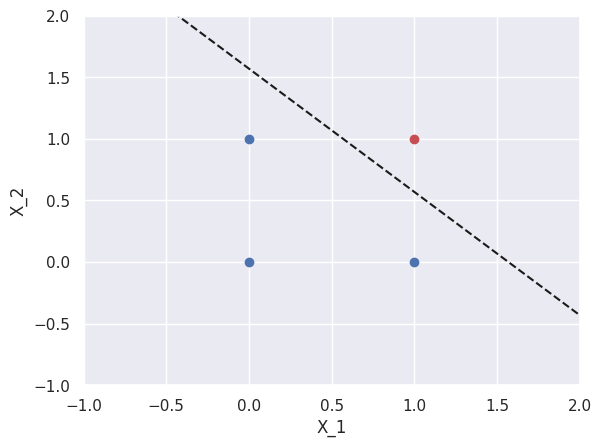

In [5]:
#Ejemplos
example = 1

if example == 1:
  X = np.array([[0,0,1,1],
                [0,1,0,1]])
  Y = np.array([[0,0,0,1]])

  #instanciamos con el nombre de neurona
  neurona = neuron(2, sigmoid, 0.9)
  neurona.fit(X,Y, epochs=500, alpha=0.001)

  p = X.shape[1]
  for i in range(p):
    if Y[0,i] == 0:
      plt.plot(X[0,i], X[1,i], "ob")
    else:
      plt.plot(X[0,i], X[1,i], "or")

  w1, w2, b = neurona.w[0], neurona.w[1], neurona.b
  plt.plot([-2,2], [(1/w2)*(-w1*(-2)-b), (1/w2)*(-w1*2-b)], "--k")

  plt.xlim([-1,2])
  plt.ylim([-1,2])
  plt.xlabel("X_1")
  plt.ylabel("X_2")

else:
  p = 100
  x = -1+2*np.random.rand(p).reshape(1,-1)
  y = -18*x+6+2.5*np.random.randn(p)
  plt.plot(x,y,".b")

  #instanciamos con el nombre de neurona
  neurona = neuron(1, linear, 0.1)
  neurona.fit(x,y, epochs=100)

  xn = np.array([[-1,1]])
  plt.plot(xn.ravel(), neurona.predict(xn), "--r")